In [18]:
import csv
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
from google.colab import files
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
df = pd.read_csv("School_levels_all_features_noNaN.csv", encoding= 'unicode_escape')

In [3]:
X = df.iloc[:, 2:-1].values
y = df.iloc[:, 445].values

In [4]:
X = StandardScaler().fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM with all features**

In [14]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.82      0.89      0.85        55
           2       0.82      0.75      0.78        75
           3       0.78      0.84      0.81        91
           4       0.91      0.89      0.90       157

    accuracy                           0.85       378
   macro avg       0.83      0.84      0.84       378
weighted avg       0.85      0.85      0.85       378



* **Principal Component Analysis**

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
# Create a dataframe for the PCA
finalDf = pd.concat([principalDf, df[['Level']]], axis = 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


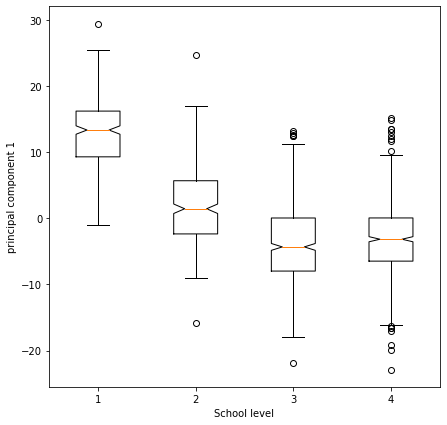

In [8]:
# Visualize principal component 1 distribution throughout levels
a = finalDf.loc[finalDf['Level'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Level'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Level'] == 3, 'principal component 1']
d = finalDf.loc[finalDf['Level'] == 4, 'principal component 1']
columns = [a, b, c, d]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
#plt.ylim(-8, 15)
plt.ylabel('principal component 1')
plt.xlabel('School level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

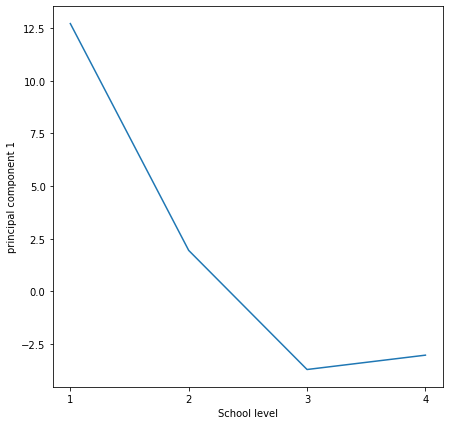

In [ ]:
# Visualize general trend with PCA mean values throguhout levels
finalDf.groupby(['Level'])['principal component 1'].mean().plot()
plt.ylabel('principal component 1')
plt.xlabel('School level')
plt.xticks(range(1, 5))
#plt.ylim(-2, 2)
plt.show()

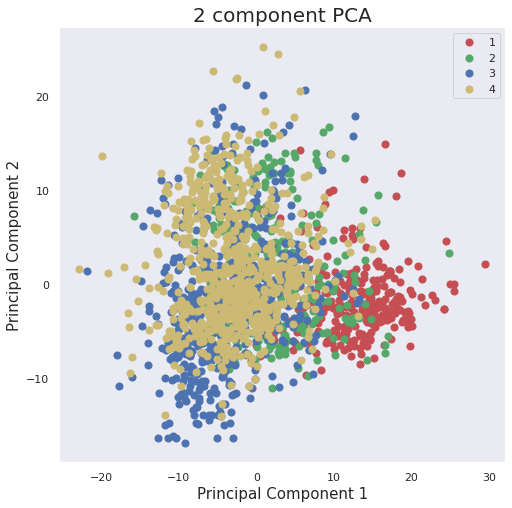

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Level'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

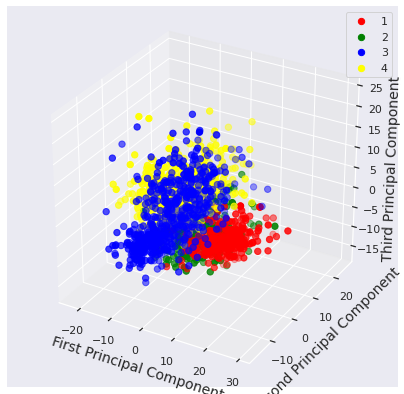

In [ ]:
#Visualize 3 dimentional PCA
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:'blue', 4:'yellow'}
labl = {1:'1',2:'2', 3:'3', 4:'4'}
marker = {1:'o',2:'o', 3:'o', 4:'o'}

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

* **Linear Discriminant Analysis**

In [ ]:
model = LinearDiscriminantAnalysis()

In [ ]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.840 (0.027)


In [ ]:
target_names = (1,2,3,4)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

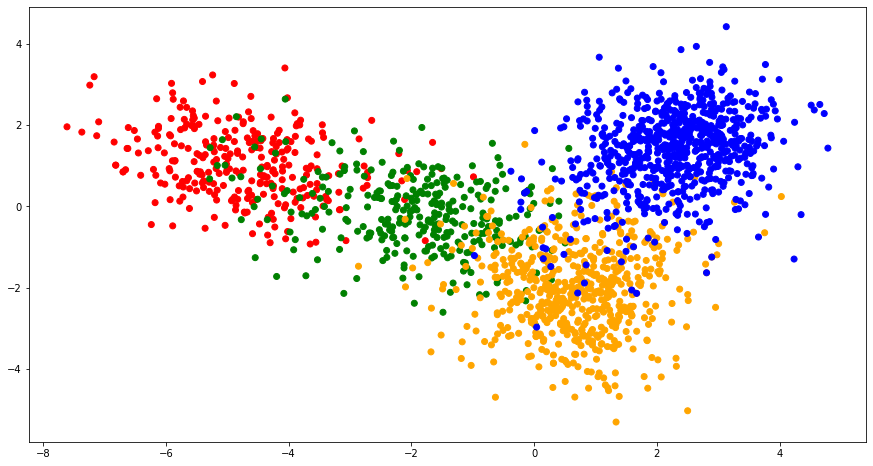

In [ ]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'orange', 4:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Level'].map(colors))
plt.show()

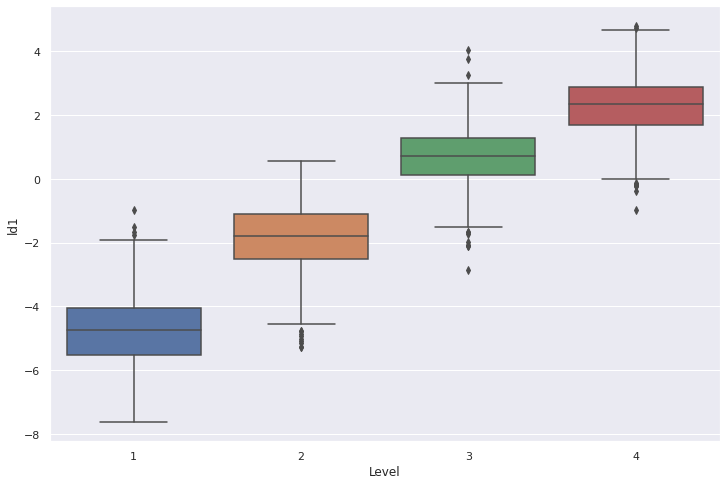

In [ ]:
# Verify LD1 distribution throughout levels
lda_df=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Level"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Level', y='ld1', data=lda_df)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

* **Account for imbalanced data**

In [ ]:
df['Level'].value_counts()[1]

291

In [ ]:
df['Level'].value_counts()[2]

311

In [ ]:
df['Level'].value_counts()[3]

602

In [ ]:
df['Level'].value_counts()[4]

721

* **Balance data by oversampling**

In [24]:
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({4: 540, 3: 540, 2: 540, 1: 540})
Testing target statistics: Counter({4: 157, 3: 91, 2: 75, 1: 55})


In [25]:
svm_model.fit(X_res, y_res)

SVC(C=10, coef0=0.5)

In [26]:
predictions = svm_model.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.82      0.89      0.85        55
           2       0.82      0.75      0.78        75
           3       0.78      0.84      0.80        91
           4       0.91      0.88      0.89       157

    accuracy                           0.84       378
   macro avg       0.83      0.84      0.83       378
weighted avg       0.85      0.84      0.84       378



In [28]:
print(metrics.confusion_matrix(y_test, predictions))

[[ 49   6   0   0]
 [ 10  56   6   3]
 [  1   3  76  11]
 [  0   3  16 138]]


* **Balance data by undersampling**

In [19]:
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 236, 2: 236, 3: 236, 4: 236})
Testing target statistics: Counter({4: 157, 3: 91, 2: 75, 1: 55})


In [20]:
svm_model.fit(X_res, y_res)

SVC(C=10, coef0=0.5)

In [21]:
predictions = svm_model.predict(X_test)

In [22]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.80      0.89      0.84        55
           2       0.78      0.80      0.79        75
           3       0.74      0.81      0.77        91
           4       0.93      0.83      0.88       157

    accuracy                           0.83       378
   macro avg       0.81      0.83      0.82       378
weighted avg       0.84      0.83      0.83       378



In [23]:
print(metrics.confusion_matrix(y_test, predictions))

[[ 49   6   0   0]
 [ 10  60   4   1]
 [  2   6  74   9]
 [  0   5  22 130]]


* # **Feature Selection with WEKA**

In [ ]:
# Features selected by WEKA
weka_df = df[['Cohesive Complexity Feature: Mendes Additive Connectives per Token',
                     'Cohesive Complexity Feature: Mendes All Connectives per Token',
                     'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token',
                     'Lexical Richness: Type Token Ratio (Segments of Length 50)',
                     'Lexical Richness: Type Token Ratio (TTR Lexical Words)',
                     'Lexical Richness: Type Token Ratio (TTR Nouns)',
                     'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals per Lexical Types)',
                     'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals)',
                     'Lexical Sophistication Feature: Age of Acquisition (AW Token)',
                     'Lexical Sophistication Feature: Imageability (LW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 5',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 1000',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 5000',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Token)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (LW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adj Type)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adv Type)',
                     'Morphological Complexity Inflection Feature: Indicatives per Verb',
                     'Morphological Complexity Inflection Feature: Past Participle Verb Density',
                     'Morphological Complexity Inflection Feature: Third Person per word token',
                     'POS Density Feature: Adverb',
                     'POS Density Feature: Coordinating Conjunction',
                     'POS Density Feature: Foreign Word',
                     'POS Density Feature: Particle',
                     'POS Density Feature: Pronoun',
                     'Referential Cohesion: Local Noun Overlap (lemma-based)',
                     'Syntactic Complexity Feature: Inverted Pseudoclefts per VP',
                     'Level']] 

* **SVM with WEKA selected features**

In [ ]:
X = weka_df.iloc[:,:-1].values
y = weka_df.iloc[:, 28].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.78      0.89      0.83        55
           2       0.73      0.63      0.68        75
           3       0.60      0.68      0.64        91
           4       0.82      0.77      0.80       157

    accuracy                           0.74       378
   macro avg       0.73      0.74      0.73       378
weighted avg       0.74      0.74      0.74       378



* **PCA with WEKA features**

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Level']]], axis = 1)

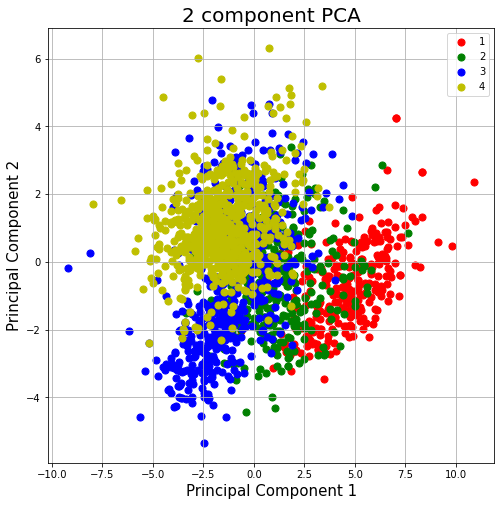

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Level'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

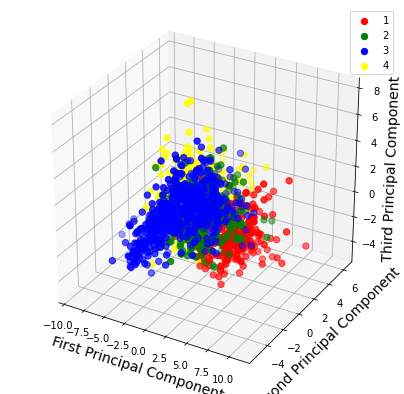

In [ ]:
#Visualize 3 dimentional PCA
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:'blue', 4:'yellow'}
labl = {1:'1',2:'2', 3:'3', 4:'4'}
marker = {1:'o',2:'o', 3:'o', 4:'o'}

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


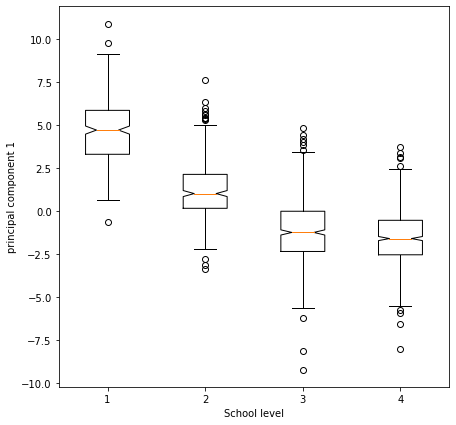

In [ ]:
# Visualize principal component 1 distribution throughout levels
a = finalDf.loc[finalDf['Level'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Level'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Level'] == 3, 'principal component 1']
d = finalDf.loc[finalDf['Level'] == 4, 'principal component 1']
columns = [a, b, c, d]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
#plt.ylim(-8, 15)
plt.ylabel('principal component 1')
plt.xlabel('School level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

* **LDA**

In [ ]:
model = LinearDiscriminantAnalysis()

In [ ]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.761 (0.025)


In [ ]:
target_names = (1,2,3,4)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

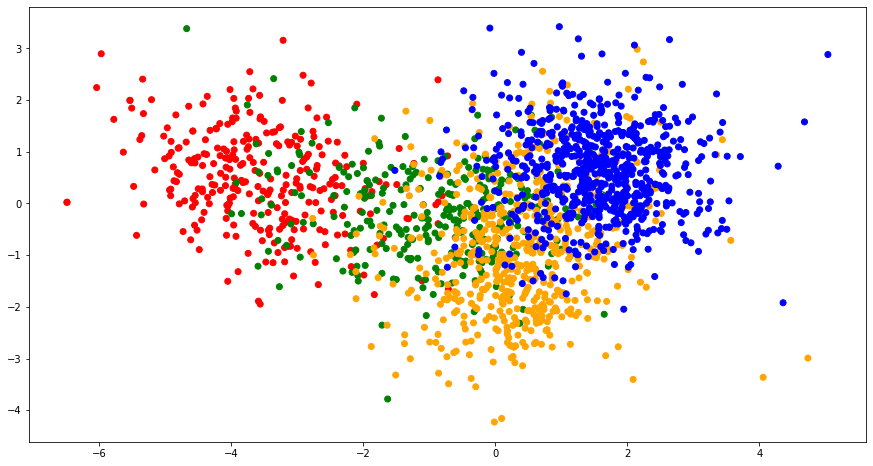

In [ ]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'orange', 4:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Level'].map(colors))
plt.show()

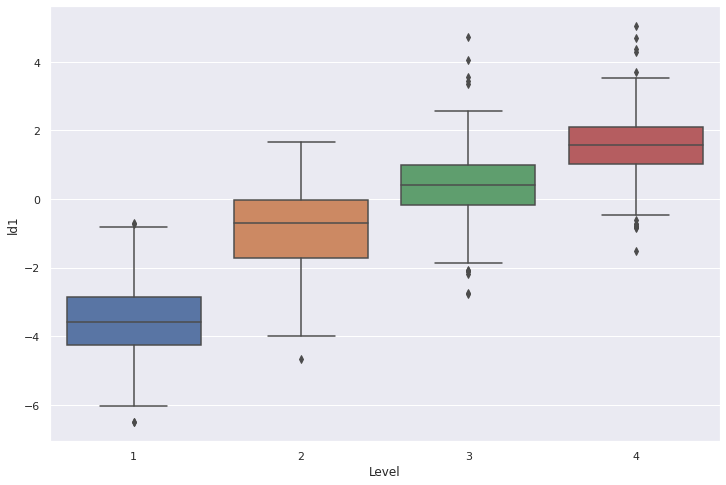

In [ ]:
# Verify LD1 distribution throughout levels
df=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Level"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Level', y='ld1', data=df)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

# **Feature selection with Random Forests**

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Visualizing Important Features')

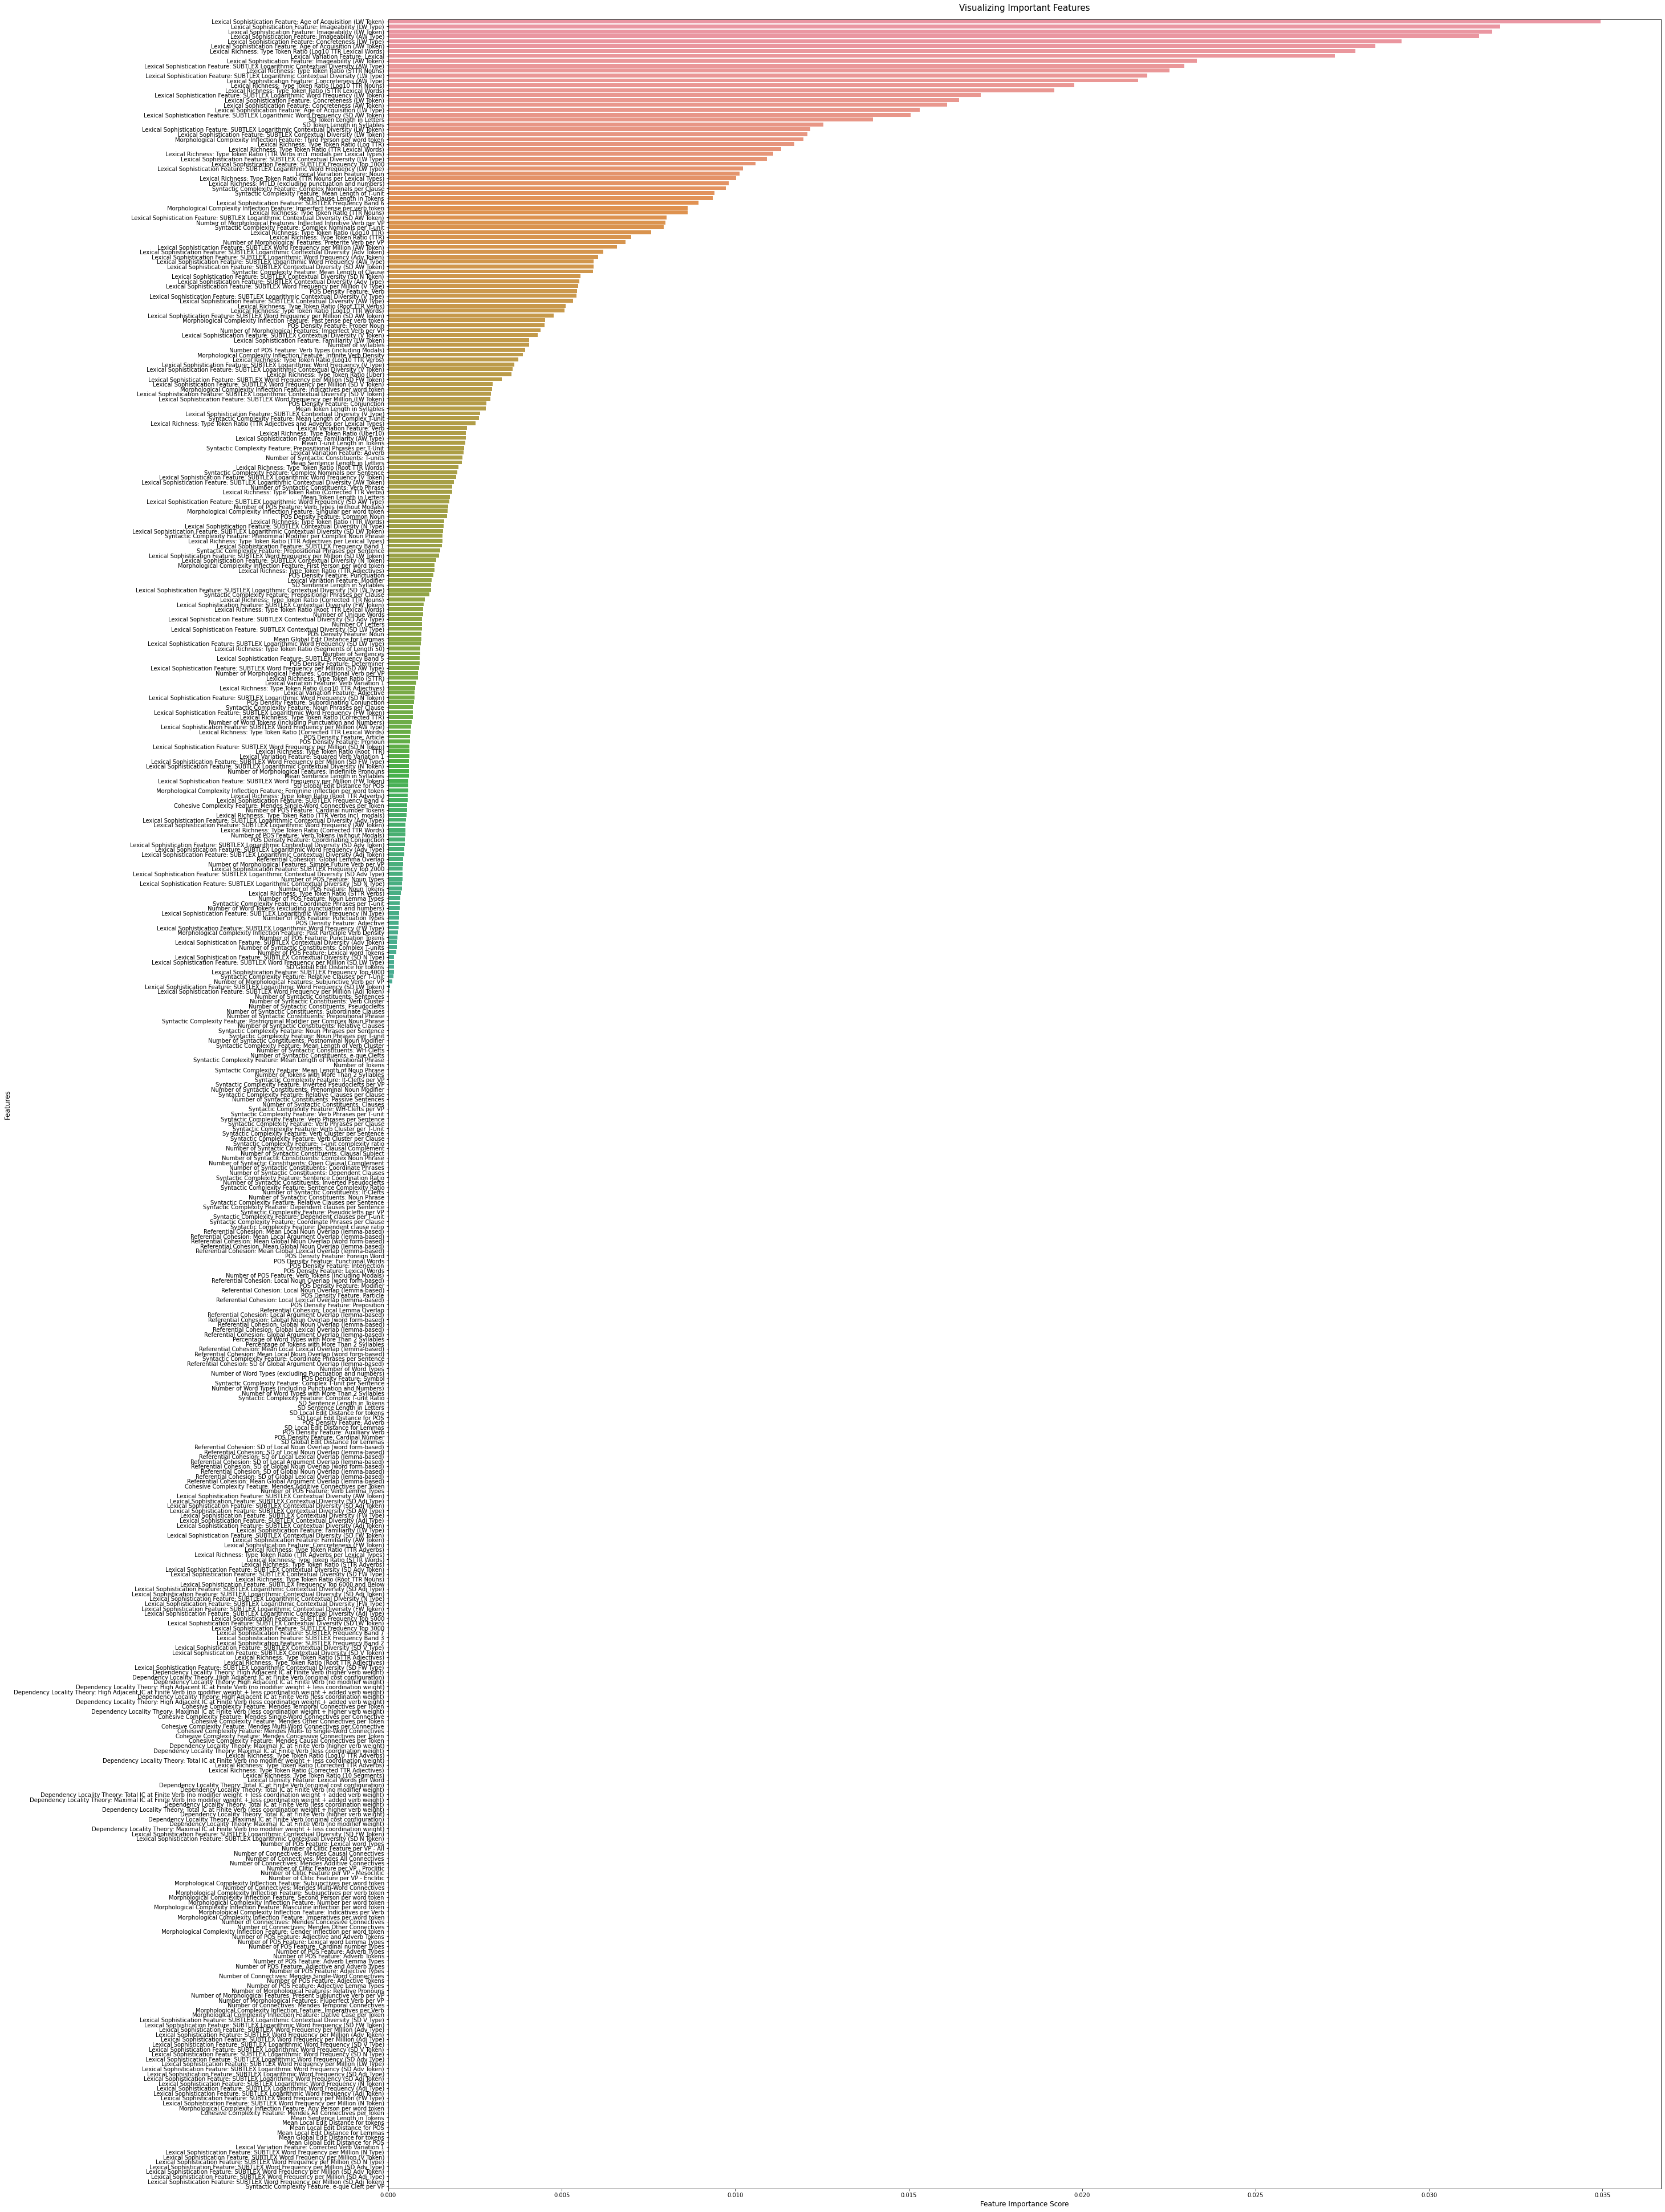

In [ ]:
features = df.columns[2:-1]
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X, y)

feature_imp = pd.Series(rf.feature_importances_, 
                        index=features).sort_values(ascending=False)
plt.rcParams["figure.figsize"] = (40,70)
#print('Feature importances: ', rf.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

In [ ]:
testdf = df[['Lexical Sophistication Feature: Age of Acquisition (AW Token)',
             'Lexical Sophistication Feature: Familiarity (AW Token)',
             'Mean Token Length in Syllables',
             'Syntactic Complexity Feature: Prepositional Phrases per Sentence',
             'Morphological Complexity Inflection Feature: Past Participle Verb Density',
             'Lexical Richness: Type Token Ratio (Corrected TTR)', 
             'Number of Syntactic Constituents: Passive Sentences',
             'Number of Syntactic Constituents: Dependent Clauses',
             'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (N Token)',
             'Syntactic Complexity Feature: Noun Phrases per T-unit',
             'Level']]

* **SVM with selected features**

In [ ]:
X = testdf.iloc[:, :-1].values
y = testdf.iloc[:, 10].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.75      0.85      0.80        55
           2       0.64      0.52      0.57        75
           3       0.54      0.60      0.57        91
           4       0.76      0.74      0.75       157

    accuracy                           0.68       378
   macro avg       0.67      0.68      0.67       378
weighted avg       0.68      0.68      0.68       378



* **Feature selection with Random Forest on WEKA feature set**

In [ ]:
features = weka_df.columns[:-1]

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Visualizing Important Features')

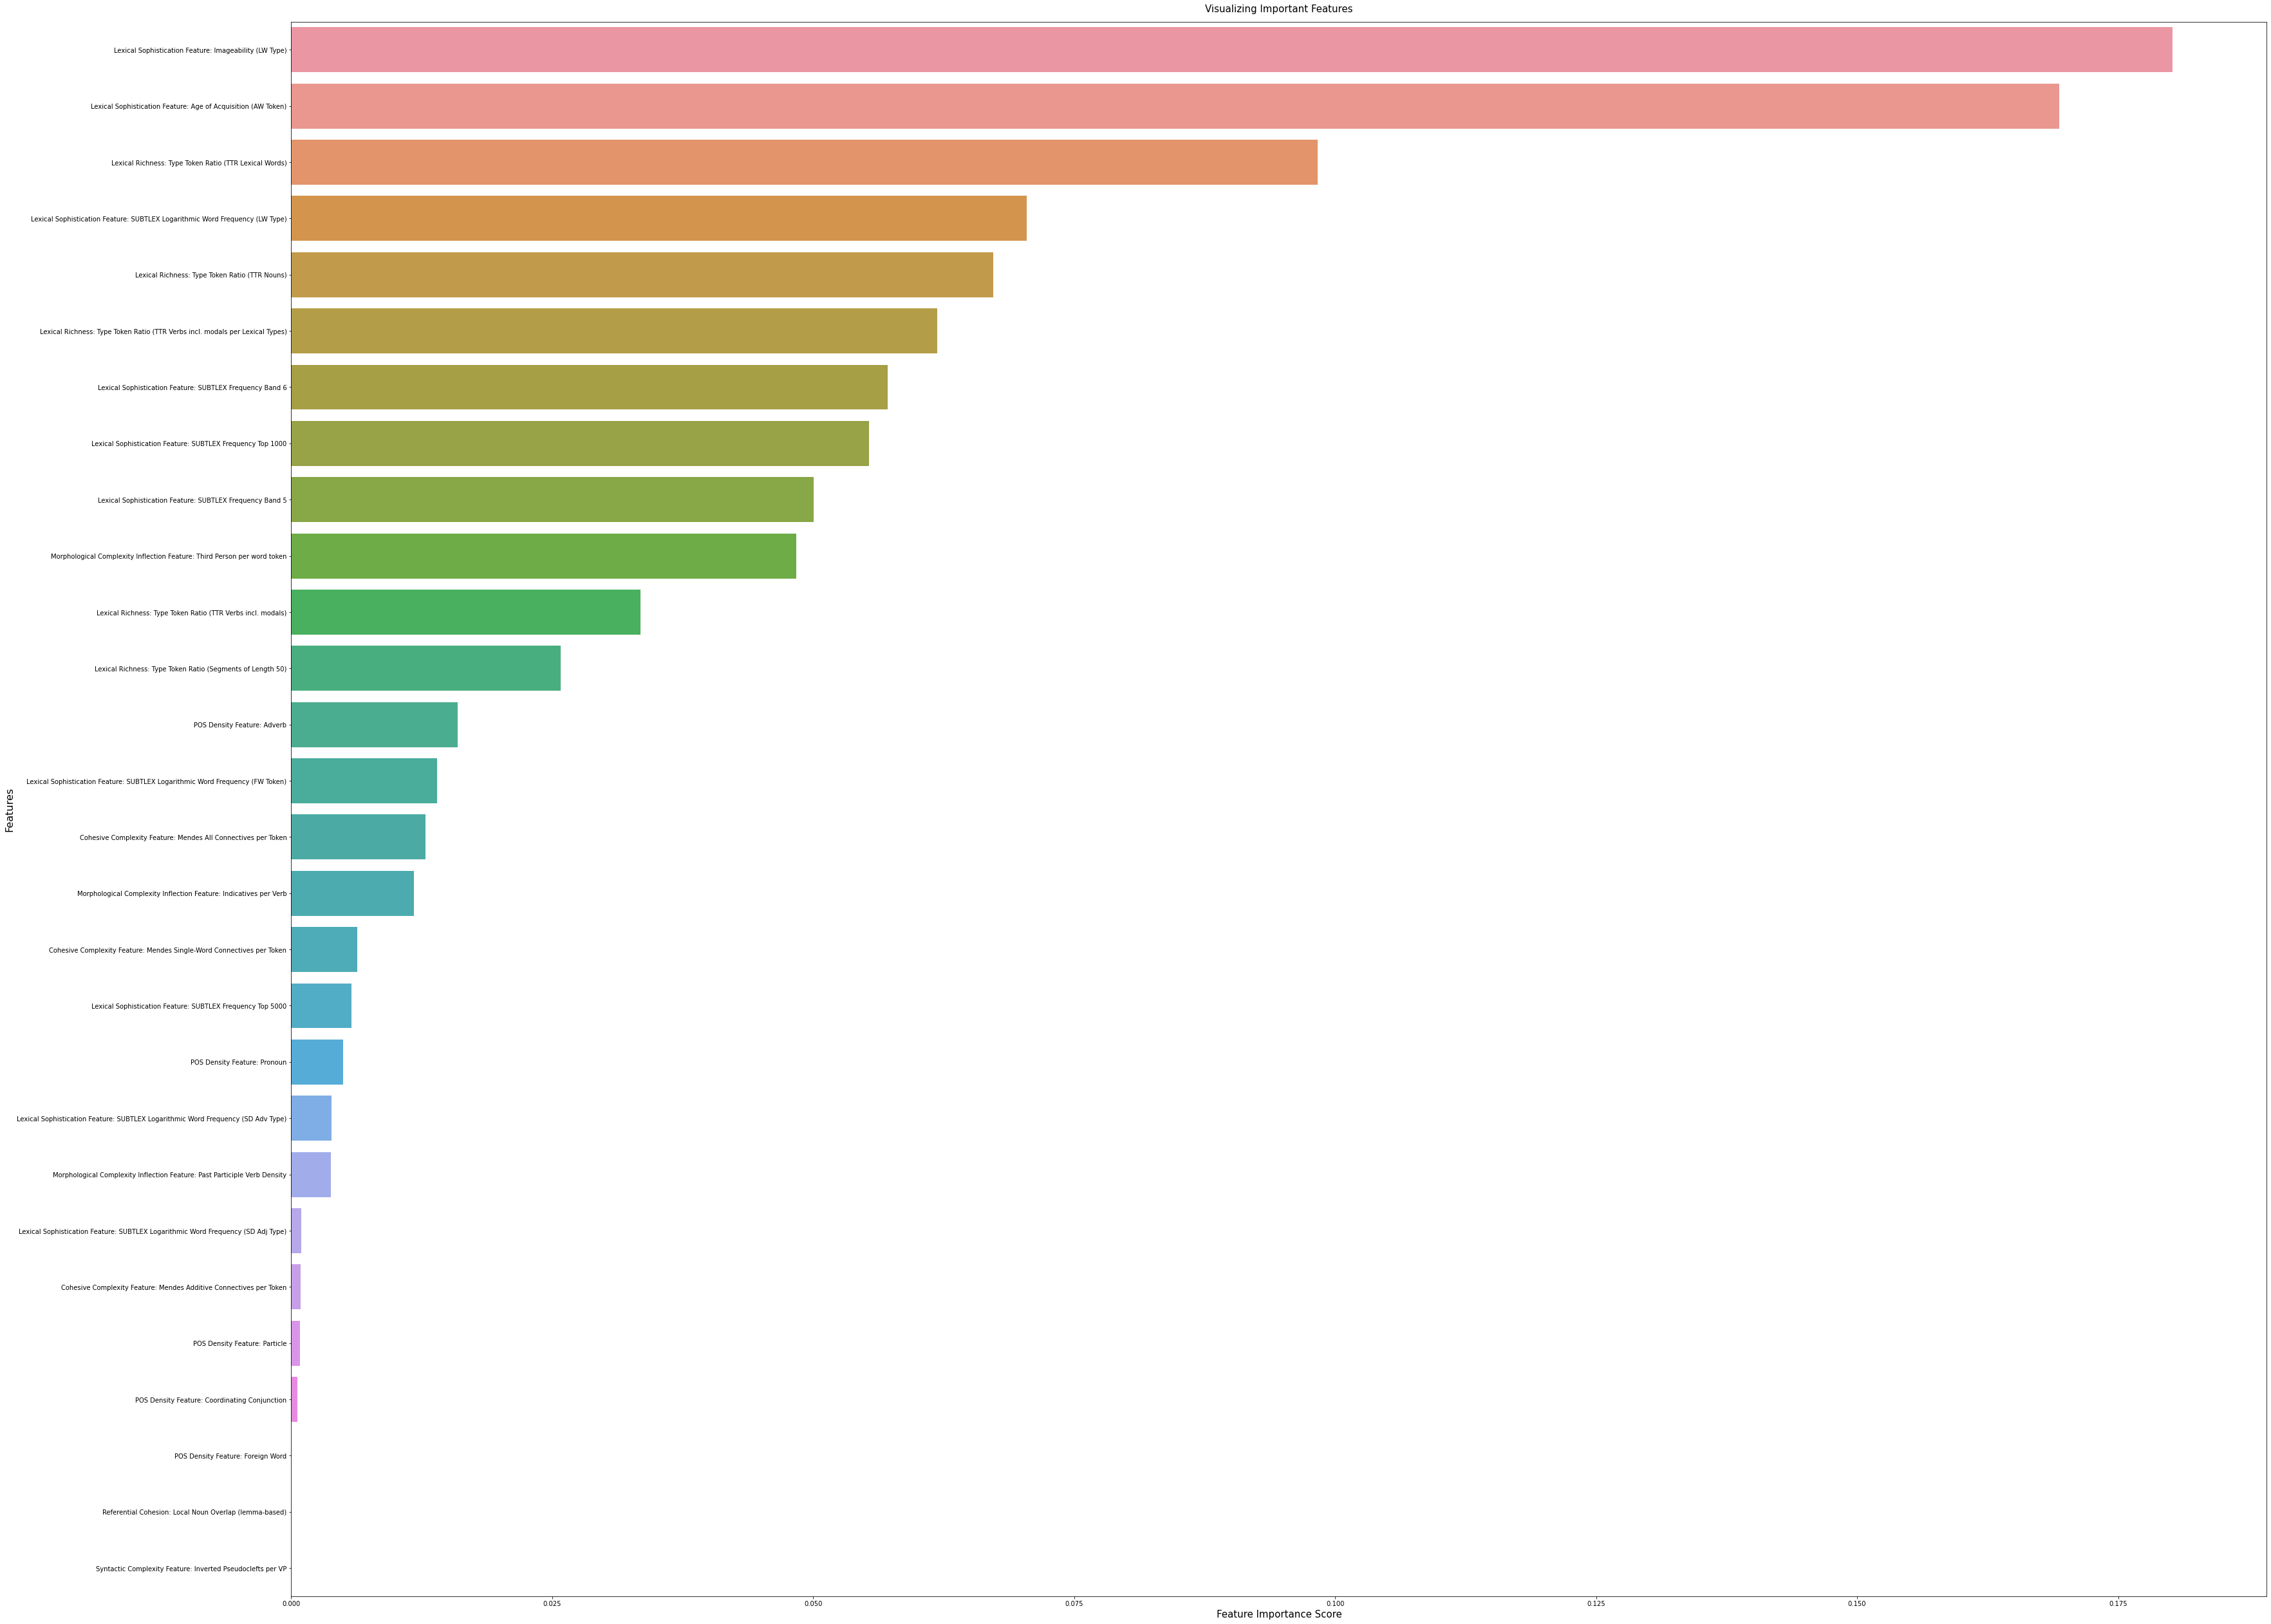

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X, y)

feature_imp = pd.Series(rf.feature_importances_, 
                        index=features).sort_values(ascending=False)
#plt.rcParams["figure.figsize"] = (55,45)
#print('Feature importances: ', rf.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=16)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

In [ ]:
weka_df2 = weka_df[['Lexical Sophistication Feature: Imageability (LW Type)',
               'Lexical Sophistication Feature: Age of Acquisition (AW Token)',
               'Lexical Richness: Type Token Ratio (TTR Lexical Words)',
               'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (LW Type)',
               'Lexical Richness: Type Token Ratio (TTR Nouns)',
               'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals per Lexical Types)',
               'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
               'Lexical Sophistication Feature: SUBTLEX Frequency Top 1000',
               'Morphological Complexity Inflection Feature: Third Person per word token',     
               'Lexical Sophistication Feature: SUBTLEX Frequency Band 5', 
               'Level'
               ]]         

In [ ]:
X = weka_df2.iloc[:,:-1].values
y = weka_df2.iloc[:, 10].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.73      0.89      0.80        55
           2       0.67      0.55      0.60        75
           3       0.58      0.59      0.59        91
           4       0.82      0.82      0.82       157

    accuracy                           0.72       378
   macro avg       0.70      0.71      0.70       378
weighted avg       0.72      0.72      0.72       378

